# `Lab 1: Concise Implementation of Convolutional Neural Network For MNIST`

`Use multiple Conv2d and linear layers!!!`

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# 합성곱 층의 출력 크기를 계산하는 함수
def cal_conv_out(h, padding, kernel_size, stride, dilation=1):
    # 출력 크기 계산
    size = int(np.floor((h + 2 * padding - dilation * (kernel_size - 1) - 1) / stride + 1))
    return size


# The Model

The only difference from our softmax regression implementation is that we add two Dense (fully-connected) layers
instead of one. The first is our hidden layer, which has 256 hidden units and uses the ReLU activation function.

### Output size of convolution layer

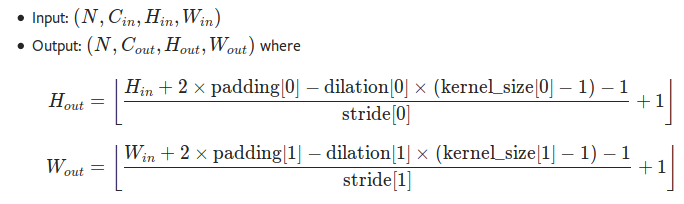

In [2]:
from IPython.display import Image
Image('./img/conv_size.png')

In [3]:
device = torch.device('cpu')
in_channels=1
out_channels=64
kernel_size=3
padding=1
stride=2

conv_out_size = cal_conv_out(28, padding, kernel_size, stride, dilation=1)
conv_out_size



14

In [4]:

model = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, padding=padding, stride=stride),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(in_features= 14*14*64, out_features=100),          
        nn.Linear(in_features=100, out_features=10),
        nn.Softmax()
        )    
model = model.to(device)

In [5]:
x = torch.ones((1,1,28,28))
x = x.to(device)
y = model(x)
y.shape

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


torch.Size([1, 10])

In [6]:
14*14*64

12544

# `Lab 2: Compare training time for CPU and GPU`

model = Network().cuda()

In [7]:
# `Lab 2: Compare training time for CPU and GPU`
# GPU 사용을 위해 Network 클래스를 정의합니다.
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.in_channels = 1
        self.out_channels = 64
        self.kernel_size = 3
        self.padding = 1
        self.stride = 2

        # Convolutional Neural Network 정의
        self.conv1 = nn.Conv2d(in_channels=self.in_channels, out_channels=self.out_channels,
                               kernel_size=self.kernel_size, padding=self.padding, stride=self.stride)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=14 * 14 * self.out_channels, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# GPU 사용을 위해 모델을 CUDA에 올리고 장치를 정의합니다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Network().to(device)

# 입력 데이터 생성 및 장치에 올리기
x = torch.ones((1, 1, 28, 28)).to(device)

# 모델에 입력을 전달하여 결과 확인
y = model(x)
y.shape


torch.Size([1, 10])